In [33]:
# Import required libraries (Homer Babbidge is not included)

import pandas as pd
from factor_analyzer import FactorAnalyzer
import matplotlib.pyplot as plt


In [34]:
# STEP 2: import data

#dataset 1: rating information  

columns_rating = ['user_id', 'movie_id', 'rating']
ratings = pd.read_csv('u.data', sep='\t', names=columns_rating, usecols=range(3), encoding="ISO-8859-1")

#dataset 2: movie information
columns_movie = ['movie_id', 'title']
movies = pd.read_csv('u.item', sep='|', names=columns_movie, usecols=range(2), encoding="ISO-8859-1")

#merge dataset1 and dataset2
#ratings = pd.merge(movies, ratings)
df=pd.merge(ratings, movies, on='movie_id')

#dataset 3: movie information
columns_movie = ['movie_id', 'title','release_date','VRD','URL','unknown','Action','Adventure','Animation','Children','Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy','Film_Noir','Horror', 'Musical', 'Mystery', 'Romance','Sci_Fi', 'Thriller', 'War', 'Western']
genre = ratings = pd.read_csv('u.item', sep='|', names=columns_movie, usecols=range(24), encoding="ISO-8859-1")

#dataset 4: user information
# user id | age | gender | occupation | zip code

columns_users=['user_id','age','gender','occupation', 'zip_code']
users=pd.read_csv('u.user',sep='|',names=columns_users)

# add user information
merged_data=pd.merge(df, users, on='user_id')

#final_data includes both users information and movie genre 
final_data=pd.merge(merged_data, genre, on='movie_id')

#define dummy variables for occupations 
data_FA_model = pd.get_dummies(final_data, columns=['occupation'], prefix = ['occ'])
#data_FA_model.head()
final_data.head()


,user_id,movie_id,rating,title_x,age,gender,occupation,zip_code,title_y,release_date,...,Fantasy,Film_Noir,Horror,Musical,Mystery,Romance,Sci_Fi,Thriller,War,Western
0,196,242,3,Kolya (1996),49,M,writer,55105,Kolya (1996),24-Jan-1997,...,0,0,0,0,0,0,0,0,0,0
1,63,242,3,Kolya (1996),31,M,marketing,75240,Kolya (1996),24-Jan-1997,...,0,0,0,0,0,0,0,0,0,0
2,226,242,5,Kolya (1996),28,M,student,92103,Kolya (1996),24-Jan-1997,...,0,0,0,0,0,0,0,0,0,0
3,154,242,3,Kolya (1996),25,M,student,53703,Kolya (1996),24-Jan-1997,...,0,0,0,0,0,0,0,0,0,0
4,306,242,5,Kolya (1996),45,M,other,73132,Kolya (1996),24-Jan-1997,...,0,0,0,0,0,0,0,0,0,0


In [35]:
#drop observations with "NaN"
#data_FA_model.dropna(subset=['Action','Adventure','Animation','Children','Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy','Film_Noir','Horror', 'Musical', 'Mystery', 'Romance','Sci_Fi', 'Thriller', 'War', 'Western', 'occ_administrator','occ_artist','occ_doctor','occ_educator','occ_engineer','occ_entertainment','occ_executive','occ_healthcare','occ_homemaker','occ_lawyer','occ_librarian','occ_marketing','occ_programmer','occ_retired','occ_salesman','occ_scientist','occ_student','occ_technician','occ_writer'])
#data_FA_model.head()

# Dropping unnecessary columns (another dream came true!!!)
final_data.drop(['occupation','title_x', 'release_date', 'VRD', 'URL', 'gender', 'zip_code','title_y'],axis=1,inplace=True)
final_data.head()


,user_id,movie_id,rating,age,unknown,Action,Adventure,Animation,Children,Comedy,...,Fantasy,Film_Noir,Horror,Musical,Mystery,Romance,Sci_Fi,Thriller,War,Western
0,196,242,3,49,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,63,242,3,31,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,226,242,5,28,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,154,242,3,25,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,306,242,5,45,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [36]:
# Dropping missing values rows
final_data.dropna(inplace=True)

In [37]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 23 columns):
user_id        100000 non-null int64
movie_id       100000 non-null int64
rating         100000 non-null int64
age            100000 non-null int64
unknown        100000 non-null int64
Action         100000 non-null int64
Adventure      100000 non-null int64
Animation      100000 non-null int64
Children       100000 non-null int64
Comedy         100000 non-null int64
Crime          100000 non-null int64
Documentary    100000 non-null int64
Drama          100000 non-null int64
Fantasy        100000 non-null int64
Film_Noir      100000 non-null int64
Horror         100000 non-null int64
Musical        100000 non-null int64
Mystery        100000 non-null int64
Romance        100000 non-null int64
Sci_Fi         100000 non-null int64
Thriller       100000 non-null int64
War            100000 non-null int64
Western        100000 non-null int64
dtypes: int64(23)
memory usage: 18.3 MB

In [38]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(final_data)
chi_square_value, p_value

(264706.5396905527, 0.0)

the p-value is 0. The test was statistically significant, indicating that the observed correlation matrix is not an identity matrix.

In [39]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(final_data)

/Users/mahdifallahi/Library/Python/3.8/lib/python/site-packages/factor_analyzer/utils.py:248: UserWarning: The inverse of the variance-covariance matrix was calculated using the Moore-Penrose generalized matrix inversion, due to its determinant being at or very close to zero.
  warnings.warn('The inverse of the variance-covariance matrix '


In [46]:
kmo_model

0.5196085622027571

Kaiser-Meyer-Olkin (KMO) Test measures the suitability of data for factor analysis. It determines the adequacy for each observed variable and for the complete model. KMO estimates the proportion of variance among all the observed variable. Lower proportion id more suitable for factor analysis. KMO values range between 0 and 1. Value of KMO less than 0.6 is considered inadequate

In [47]:
# Create factor analysis object and perform factor analysis
#fa = FactorAnalyzer()
fa = FactorAnalyzer(rotation=None)
fa.fit(final_data)
# Check Eigenvalues
ev, v = fa.get_eigenvalues()
ev

array([2.24833804, 2.00485466, 1.66716917, 1.45967713, 1.19627107,
       1.13961211, 1.08499773, 1.08172241, 1.05351436, 1.00571675,
       1.00066118, 0.96323692, 0.8969289 , 0.88570425, 0.81852898,
       0.79553271, 0.74024211, 0.70949041, 0.61349486, 0.58188986,
       0.43106446, 0.35500275, 0.26634917])

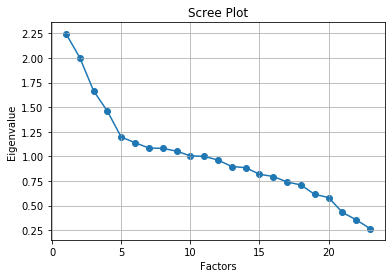

In [48]:
# Create scree plot using matplotlib
plt.scatter(range(1,final_data.shape[1]+1),ev)
plt.plot(range(1,final_data.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

The scree plot method draws a straight line for each factor and its eigenvalues. Number eigenvalues greater than one considered as the number of factors.

Here, you can see only for 11-factors eigenvalues are greater than one. It means we need to choose only 11 factors (or unobserved variables).


In [49]:
# Create factor analysis object and perform factor analysis
# Get variance of each factors
fa.get_factor_variance()

(array([1.69081815, 1.39566714, 0.89330431]),
 array([0.07351383, 0.06068118, 0.03883932]),
 array([0.07351383, 0.13419501, 0.17303433]))

Total 17% cumulative Variance explained by the 11 factors.